In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
crimeratedata = pd.read_csv('final_crimes.csv')
crimeratedata.head()

,state_abbr,year,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime,crime_rate
0,AL,2017,4875120,25469,419,2001,4233,18816,143774,31270,99707,12797,338486,6.943132
1,AL,2018,4887681,25567,383,2032,4047,19105,138702,29101,96328,13273,328538,6.721756
2,AL,2019,4903185,25046,358,2068,3941,18679,131133,26079,92477,12577,312358,6.370512
3,AK,2017,739786,6338,62,1074,952,4250,26203,4167,17782,4254,65082,8.797409
4,AK,2018,735139,6555,47,1212,896,4400,24345,3985,16364,3996,61800,8.406573


In [3]:
dc = crimeratedata['state_abbr']=='DC'

In [4]:
dccrimerate = crimeratedata.loc[dc]
dccrimerate

,state_abbr,year,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,total_crime,crime_rate
24,DC,2019,705749,7403,166,345,2713,4179,30821,1843,26645,2333,76448,10.832180
25,DC,2017,695691,6976,116,444,2625,3791,29736,1809,25340,2587,73424,10.554111
26,DC,2018,701547,6995,160,450,2415,3970,30726,1788,26345,2593,75442,10.753663
351,DC,1995,554000,14744,360,292,6864,7228,52697,10185,32319,10193,134882,24.346931
352,DC,1996,543000,13411,397,260,6444,6310,51188,9828,31385,9975,129198,23.793370
353,DC,1997,529000,10708,301,218,4501,5688,41341,6963,26809,7569,104098,19.678261
354,DC,1998,523000,8988,260,190,3606,4932,37222,6361,24360,6501,92420,17.671128
355,DC,1999,519000,8448,241,248,3344,4615,33420,5067,21701,6652,83736,16.134104
356,DC,2000,572059,8626,239,251,3554,4582,33000,4745,21655,6600,83252,14.553044
357,DC,2001,573822,9195,231,181,3780,5003,35232,4949,22313,7970,88854,15.484593


In [5]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = dccrimerate.year.values.reshape(-1, 1)
y = dccrimerate.crime_rate.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (25, 1) (25, 1)


array([[2019],
       [2017],
       [2018],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016]])

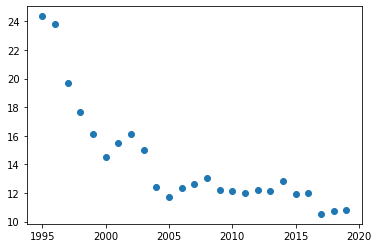

In [6]:
# Plot the data

### BEGIN SOLUTION

plt.scatter(X, y)

### END SOLUTION

In [7]:
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### BEGIN SOLUTION

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [8]:
# Create the model

### BEGIN SOLUTION

from sklearn.linear_model import LinearRegression

model = LinearRegression()

### END SOLUTION

In [9]:
# Fit the model to the training data. 

### BEGIN SOLUTION

model.fit(X_train, y_train)

### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Calculate the mean_squared_error and the r-squared value
# for the testing data

from sklearn.metrics import mean_squared_error, r2_score

### BEGIN SOLUTION

# Use our model to make predictions
predicted = model.predict(X_test)

# Score the predictions with mse and r2
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

### END SOLUTION

Mean Squared Error (MSE): 5.386522140564329
R-squared (R2 ): -0.926525081624386


In [11]:
# Call the `score` method on the model to show the r2 score

### BEGIN SOLUTION
model.score(X_test, y_test)
### END SOLUTION

-0.926525081624386

In [12]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.7536083351348585
Testing Score: -0.926525081624386


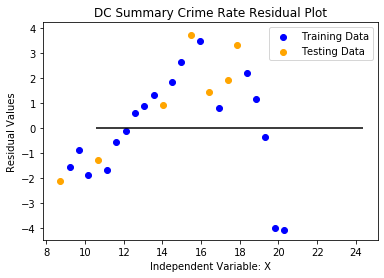

In [13]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("DC Summary Crime Rate Residual Plot")
plt.xlabel('Independent Variable: X')
plt.ylabel('Residual Values')
plt.savefig('dc_summary_crimerate_residualplot.png')
### END SOLUTION

In [14]:
# This residual plot gives an visual understanding of how "good" your predicted values are. 
# Positive values for the residual (on the y-axis) mean the prediction was too low. 
# Negative values mean the prediction was too high. 
# 0 means the guess was exactly correct.

In [15]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[1995]]
Max X Value: [[2019]]


In [16]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)
### END SOLUTION

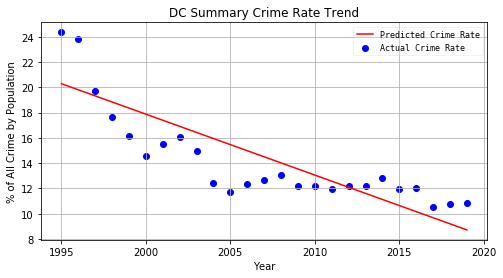

In [17]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.title("DC Summary Crime Rate Trend")
plt.xlabel("Year")
plt.ylabel("% of All Crime by Population")
plt.grid(True)
plt.gcf().set_size_inches(8,4)
plt.legend(('Predicted Crime Rate', 'Actual Crime Rate'), loc='best', framealpha=0.25, prop={'size':'small', 'family':'monospace'})
plt.savefig('dc_summary_crimerate_trend.png')
### END SOLUTION

In [18]:
prediction = model.predict([[1995]])
prediction

array([[20.28822836]])

In [19]:
prediction1 = model.predict([[2000]])
prediction1

array([[17.8774275]])

In [20]:
prediction2 = model.predict([[2005]])
prediction2

array([[15.46662665]])

In [21]:
prediction3 = model.predict([[2010]])
prediction3

array([[13.05582579]])

In [22]:
prediction4 = model.predict([[2015]])
prediction4

array([[10.64502493]])

In [23]:
prediction5 = model.predict([[2020]])
prediction5

array([[8.23422407]])